In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.init as init
import torch.distributions as distributions

import numpy as np
import pandas as pd

import time
sns.set_palette(sns.color_palette("hls", 8)[::-1])
import matplotlib.image as mpimg
import matplotlib.font_manager as fm

In [2]:
import matplotlib
# ref: https://matplotlib.org/gallery/api/font_family_rc_sgskip.html
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'


# Figure 1

In [21]:
def f1(x, y):
    return  np.log(sc.stats.poisson.pmf(10, x)*sc.stats.poisson.pmf(10, y) \
                    + sc.stats.poisson.pmf(10, x)* sc.stats.poisson.pmf(40, y) \
                     + sc.stats.poisson.pmf(40, x) * sc.stats.poisson.pmf(40, y))

# Make data
X1 = np.arange(5, 45, 0.5)
Y1 = np.arange(5, 45, 0.5)
X1, Y1 = np.meshgrid(X1, Y1)
R1 =  f1(X1,Y1)

In [72]:
def f(x, y):
    
    return x**4 + y**4 + 4 * y**2 + 4 * x ** 2

def f_quad(x, y, x0, y0):
    const = f(x0, y0)
    first = np.array([x-x0, y-y0]) @ np.array([4 * x0 ** 3 + 8*x0,4* y0 ** 3 + 8*y0])
    quad = np.array([x-x0, y-y0]) @ ( np.array([[12 *x0**2 + 8,0],[0,12 * y0**2+8]])) @ np.array([x-x0,y-y0]).T
    
    return const + first + quad

def f_first(x,y,x0,y0):
    const = f(x0, y0)
    first = np.array([x-x0, y-y0]) @ np.array([4 * x0 ** 3 + 8*x0, y0 ** 3 + 8*y0])
    
    return const + first

f_first_vec = np.vectorize(f_first)
f_quad_vec = np.vectorize(f_quad)
                    
# Make data
X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
R_quad =  -f_quad_vec(X, Y, 0.7, -0.7)
R_first = -f_first_vec(X, Y,0.7, -0.7)
R =  -f(X, Y)


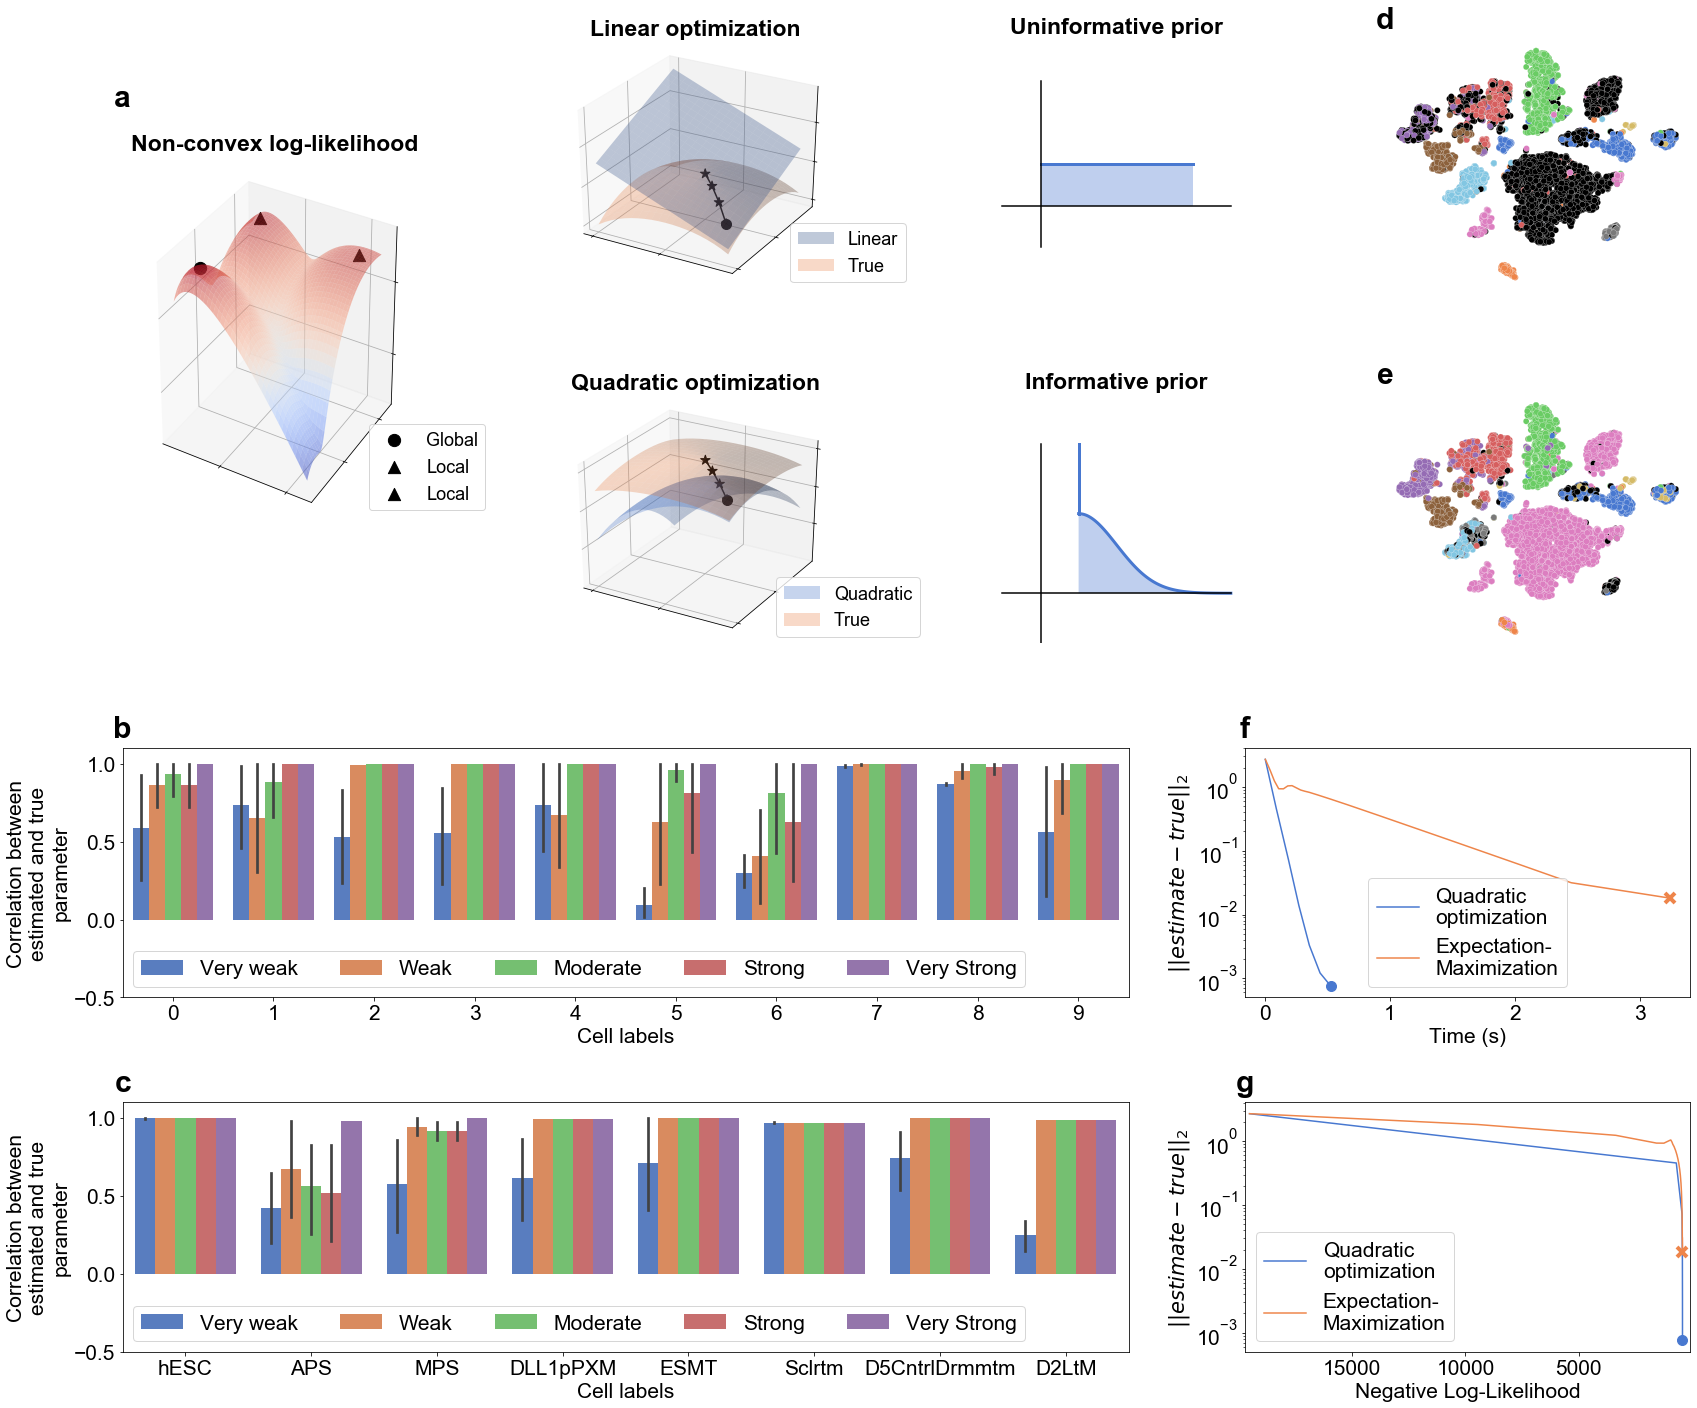

In [310]:
matplotlib.rcParams.update({'font.size': 21})
sns.set_palette(sns.color_palette("muted"))
fig1 = plt.figure(figsize=(24,20))
gs1 = fig1.add_gridspec(12,12)

# First row
fig1a1 = fig1.add_subplot(gs1[1:5,0:3], projection='3d')

fig1a2 = fig1.add_subplot(gs1[0:3,3:6], projection='3d')
fig1a3 = fig1.add_subplot(gs1[3:6,3:6], projection='3d')

fig1a4 = fig1.add_subplot(gs1[0:3,6:9])
fig1a5 = fig1.add_subplot(gs1[3:6,6:9])

fig1a6 = fig1.add_subplot(gs1[0:3,9:12])
fig1a7 = fig1.add_subplot(gs1[3:6,9:12])



x = np.linspace(0,2,100)
fig1a4.plot(x, np.repeat(1/2, 100), linewidth=3)
fig1a4.fill_between(x, np.repeat(1/2, 100), alpha=0.35)

fig1a5.plot(x+0.5, sc.stats.norm.pdf(x+0.5, 0.5, 0.5), c=fig1a4.get_lines()[-1].get_c(), linewidth=3)
fig1a5.fill_between(x+0.5, sc.stats.norm.pdf(x+0.5, 0.5, 0.5), alpha=0.35)


x_line = np.repeat(0.5, 10)
y_line = np.linspace(sc.stats.norm.pdf(0, 0, 0.5), 1.5, 10)
fig1a5.plot(x_line, y_line, c=fig1a4.get_lines()[-1].get_c(), linewidth=3)

fig1a4.plot([0,0], [-0.5,1.5], color='black')
fig1a4.plot([-0.5,2.5], [0,0], color='black')

fig1a5.plot([0,0], [-0.5,1.5], color='black')
fig1a5.plot([-0.5,2.5], [0,0], color='black')

fig1a4.set_xlim([-1,3])
fig1a4.set_ylim([-1,2])
fig1a4.set_xticks([])
fig1a4.set_yticks([])
fig1a4.axis('off')
fig1a4.set_title('Uninformative prior', position=(0.5, 0.97))

fig1a5.set_xlim([-1,3])
fig1a5.set_ylim([-0.5,2])
fig1a5.set_xticks([])
fig1a5.set_yticks([])
fig1a5.axis('off')
fig1a5.set_title('Informative prior', position=(0.5, 0.97))

cmap_liver = sns.color_palette("muted", len(liver_hue_order))
cmap_liver[-1] = (0,0,0)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=fig1a7, hue=liver_excell, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=0.2)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=fig1a6, hue=liver_cellassign, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=0.2)

fig1a7.axis('off')
fig1a7.set_title('Excell', position=(0.5, 0.97))
fig1a6.axis('off')
fig1a6.set_title('Local optimum or saddle point', position=(0.5, 0.97))



# draw function
surf = fig1a1.plot_surface(X1,Y1,R1,  linewidth=0, cmap=cm.coolwarm, alpha=0.5)
fig1a1.scatter(10, 10, f1(10,10), label='Global', color='black', marker='o', s=150)
fig1a1.scatter(10, 40, f1(10, 40),label='Local', color='black', marker='^', s=150)
fig1a1.scatter(40, 40, f1(40,40), label='Local', color='black', marker='^', s=150)

#legend
fig1a1.legend(loc='upper center', bbox_to_anchor=(1,0.3), fontsize=18)

# axis labels
fig1a1.set_zticklabels([])
fig1a1.set_xticklabels([])
fig1a1.set_yticklabels([])

fig1a1.set_title('Non-convex log-likelihood', position=(0.5, 1.0+0.05))


# create objects 
surf_first = fig1a2.plot_surface(X,Y,R_first, linewidth=0, alpha=0.3, label='Linear')
surf = fig1a2.plot_surface(X,Y,R,  linewidth=0, alpha=0.3, label='True')
point = fig1a2.scatter([0.7],[-0.7],[-f(0.7,-0.7)],s=100,color='black', alpha=1)
xs, ys = np.linspace(0,0.7,4), np.linspace(0,-0.7,4)
points = fig1a2.scatter(xs, ys, -f(xs,ys) ,s=100,color='black', alpha=1, marker='*')
lines = fig1a2.plot(xs, ys, -f(xs,ys),color='black', alpha=1)


# axis labels
fig1a2.set_zticklabels([])
fig1a2.set_xticklabels([])
fig1a2.set_yticklabels([])

# legend
surf_first._edgecolors2d=surf_first._edgecolors3d
surf_first._facecolors2d=surf_first._facecolors3d

surf._edgecolors2d=surf._edgecolors3d
surf._facecolors2d=surf._facecolors3d

fig1a2.legend(loc='upper center', bbox_to_anchor=(1,0.3), fontsize=18)

fig1a2.set_title('Linear optimization', position=(0.5, 1.0+0.05))


# create objects 
surf_quad = fig1a3.plot_surface(X,Y,R_quad,  linewidth=0,alpha=0.3, label ='Quadratic')
surf = fig1a3.plot_surface(X,Y,R,  linewidth=0, alpha=0.3, label='True')
point = fig1a3.scatter([0.7],[-0.7],[-f(0.7,-0.7)],s=100,color='black', alpha=1)
xs, ys = np.linspace(0,0.7,4), np.linspace(0,-0.7,4)
points = fig1a3.scatter(xs, ys, -f(xs,ys) ,s=100,color='black', alpha=1, marker='*')
lines = fig1a3.plot(xs, ys, -f(xs,ys),color='black', alpha=1)

# axis labels
fig1a3.set_zticklabels([])
fig1a3.set_xticklabels([])
fig1a3.set_yticklabels([])

# legend
surf_quad._edgecolors2d=surf_quad._edgecolors3d
surf_quad._facecolors2d=surf_quad._facecolors3d

surf._edgecolors2d=surf._edgecolors3d
surf._facecolors2d=surf._facecolors3d

fig1a3.legend(loc='upper center', bbox_to_anchor=(1,0.3), fontsize=18)

fig1a3.set_title('Quadratic optimization', position=(0.5, 1.0+0.05))

# correlation plot
fig1b = fig1.add_subplot(gs1[6:9, 0:8])
fig1c = fig1.add_subplot(gs1[9:12, 0:8])

corr_df_sim = pd.read_csv('corr_df_sim.csv', index_col=0)
corr_df_sim['pm'] = np.repeat(['Very weak', 'Weak', 'Moderate', 'Strong', 'Very Strong'], 5)
df_plot_sim = pd.melt(corr_df_sim, id_vars='pm')
sns.barplot(x='variable', y='value', data=df_plot_sim, 
              hue='pm', ax=fig1b)

fig1b.set_ylabel('Correlation between\nestimated and true\nparameter')
fig1b.set_xlabel('Cell labels')
fig1b.set_ylim([-0.5,1.1])
fig1b.legend(ncol=5)

corr_df_real = pd.read_csv('corr_df_real.csv', index_col=0)
corr_df_real['pm'] = np.repeat(['Very weak', 'Weak', 'Moderate', 'Strong', 'Very Strong'], 5)
df_plot_real = pd.melt(corr_df_real, id_vars='pm')
sns.barplot(x='variable', y='value', data=df_plot_real, 
              hue='pm', ax=fig1c)

fig1c.set_ylabel('Correlation between\nestimated and true\nparameter')
fig1c.set_xlabel('Cell labels')
fig1c.set_ylim([-0.5,1.1])
fig1c.legend(ncol=5)

# convergence plot
fig1d = fig1.add_subplot(gs1[6:9, 8:12])
fig1e = fig1.add_subplot(gs1[9:12, 8:12])

df_qn = pd.read_csv('df_qn.csv', index_col=0)
df_em = pd.read_csv('df_em.csv', index_col=0)
df_qn['Methods'] = 'Quadratic\noptimization'
df_em['Methods'] = 'Expectation-\nMaximization'
df = pd.concat([df_qn, df_em], axis=0)

sns.lineplot(x='time', y='diff', hue='Methods', data=df, ax=fig1d)
fig1d.plot(0.526328, 0.000754, marker='o', c=fig1d.get_lines()[0].get_c(), markersize=10)
fig1d.plot(3.241187, 0.018114, marker='x', c=fig1d.get_lines()[1].get_c(), markersize=10, mew=4)

sns.lineplot(x='nLL', y='diff', hue='Methods', data=df, ax=fig1e)
fig1e.plot(424.158295, 0.000754, marker='o', c=fig1e.get_lines()[0].get_c(), markersize=10)
fig1e.plot(427.790771, 0.018114, marker='x', c=fig1e.get_lines()[1].get_c(), markersize=10, mew=4)

handles, labels = fig1d.get_legend_handles_labels()
fig1d.legend(handles=handles[1:], labels=labels[1:])
fig1d.set_xlabel('Time (s)')
fig1d.set_ylabel('$||estimate - true|| _2$')
fig1d.set_yscale('log')

handles, labels = fig1e.get_legend_handles_labels()
fig1e.legend(handles=handles[1:], labels=labels[1:])
fig1e.set_xlim([df_em['nLL'].max()*1.01, 100])
fig1e.set_xlabel('Negative Log-Likelihood')
fig1e.set_ylabel('$||estimate - true|| _2$')
fig1e.set_yscale('log')

axes1 = fig1.get_axes()
axes1[0].text2D(0.5, 1.02, "Non-convex log-likelihood", transform=axes1[0].transAxes, ha='center',
               fontsize=23, fontweight='bold')

fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=30)
for i, label in enumerate(['a', '', '', '', '', 'd', 'e', 
                            'b', 'c', 'f', 'g']):
    if i == 0:
        x  = 0.2
    else:
        x = 0
    
    axes1[i].set_title(label, position=(0, 1.0+0.02+x), fontproperties=fontprop) 
 
titles = ['Linear optimization', 'Quadratic optimization', 
         'Uninformative prior', 'Informative prior']
for i in [1,2,3,4]:
    if i<3:
        axes1[i].set_title(titles[i-1], fontsize=23, fontweight='bold', 
                      position=(0.5, 1.0+0.08))
    else:
        axes1[i].set_title(titles[i-1], fontsize=23, fontweight='bold', 
                      position=(0.5, 1.0))
        

plt.tight_layout()
plt.savefig('figure1.svg')
plt.show()

# Figure 2

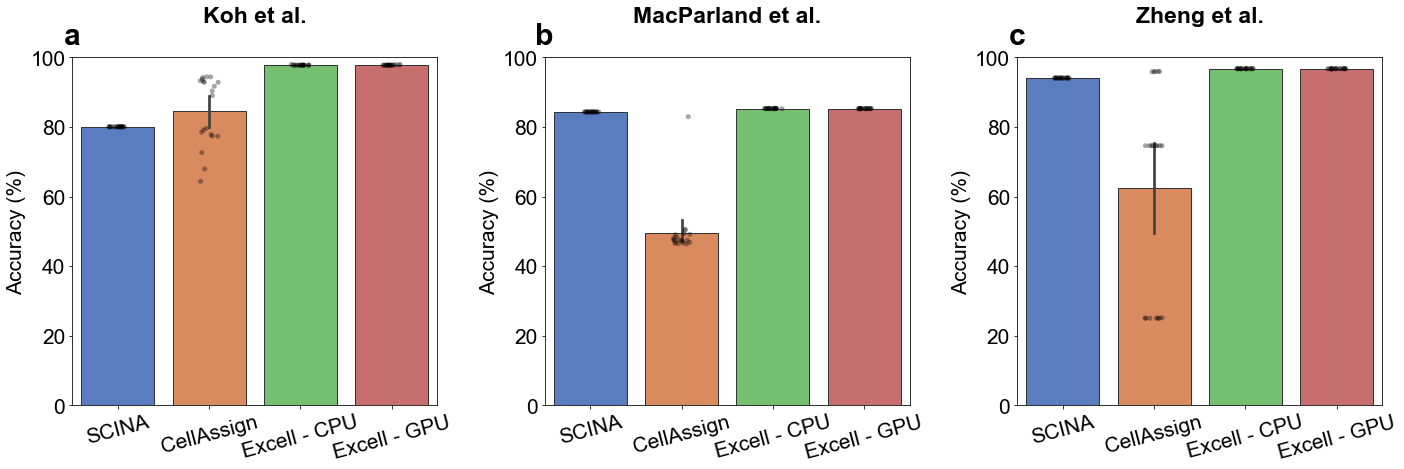

In [300]:
# method vs accuracy
matplotlib.rcParams.update({'font.size': 21})
sns.set_palette(sns.color_palette("muted"))
fig1 = plt.figure(figsize=(20,7))
gs1 = fig1.add_gridspec(1,3)

fig1f1 = fig1.add_subplot(gs1[0, 0])
fig1f2 = fig1.add_subplot(gs1[0, 1])
fig1f3 = fig1.add_subplot(gs1[0, 2])

sns.barplot(data=koh_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f1,
           edgecolor='.2')
plt.setp(fig1f1.patches, linewidth=1)
sns.stripplot(data=koh_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f1,
             color='0', alpha=.35)
sns.barplot(data=liver_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f2,
           edgecolor='.2')
sns.stripplot(data=liver_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f2,
             color='0', alpha=.35)
sns.barplot(data=Zheng_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f3,
           edgecolor='.2')
sns.stripplot(data=Zheng_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)', ax=fig1f3,
             color='0', alpha=.35)

fig1f1.set_xticklabels(['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU'], rotation=15)
fig1f2.set_xticklabels(['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU'], rotation=15)
fig1f3.set_xticklabels(['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU'], rotation=15)

datasets = ['Koh et al.', 'MacParland et al.', 'Zheng et al.']
axes1 = fig1.get_axes()
titles = ['a', 'b', 'c']
fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=30)
for i in [0, 1, 2]:
    axes1[i].set_xlabel('')
    axes1[i].set_ylim([0, 100])
    axes1[i].text(1.5, 110, s=datasets[i], fontsize=23, fontweight='bold', horizontalalignment='center')
    axes1[i].set_title(titles[i], position=(0, 1.0+0.02), fontproperties=fontprop) 
    
plt.tight_layout()
plt.savefig('figure2.svg')
#plt.show()

# Figure 3

In [293]:
#koh

koh_cell_names = pd.Series(['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'Unknown'],
                          index=['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'unassigned'])
koh_hue_order = ['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'Unknown']

# tureplot
koh_meta=pd.read_csv('/scratch/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')

# cellassign
koh_cellassign = koh_cell_names.loc[pd.read_csv('koh_result/1_koh.csv')['x'].values].values.astype(str)
# excell
koh_excell = pd.read_csv('koh_result/koh_median.csv')['0'].values
# scina
koh_scina = pd.read_csv('koh_scina.csv', index_col=0)['x'].values

koh_scina_acc = pd.Series(np.repeat(0.800448430493274, 20))
koh_cellassign_acc = pd.read_csv('koh_result/koh_cellassign_acc.csv')['0']
koh_cpu_acc = pd.read_csv('koh_result/koh_excell_cpu_acc.csv')['0']
koh_gpu_acc = pd.read_csv('koh_result/koh_excell_gpu_acc.csv')['0']
koh_acc = pd.concat([koh_scina_acc, koh_cellassign_acc, koh_cpu_acc, koh_gpu_acc], axis=1) * 100

koh_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=koh_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')
#plt.ylim([0,100])



In [294]:
#liver

liver_cell_names = pd.Series(['LSECs', 'Cholangiocytes', 'Macrophages',
                   'αβ T cells', 'NK cells', 'γδ T cells',
                   'Hepatocytes', 'Mature B cells', 'Hepatic stellate cells',
                   'Plasma cells', 'Erythroid cells', 'Unknown', 'Unknown', 'Unknown'],
                               index=['LSECs', 'Cholangiocytes', 'Macrophages',
                                     'ab_T_cells', 'NK_cells', 'gd_T_cells',
                                     'Hepatocytes','Mature_B_cells','Hepatic_Stellate_Cells',
                                     'Plasma_cells', 'Erythroid_cells', 'unassigned', 'other', 'unknown'])

liver_hue_order = ['LSECs', 'Cholangiocytes', 'Macrophages',
                   'αβ T cells', 'NK cells', 'γδ T cells',
                   'Hepatocytes', 'Mature B cells', 'Hepatic stellate cells',
                   'Plasma cells', 'Erythroid cells', 'Unknown', 'Unknown']

#trueplot
liver_meta = pd.read_csv('/scratch/ch6845/dynamic_cell_classifier/data/HumanLiver_extract/HumanLiver.metadata.tsv',sep='\t')
clusterid_to_clustername=pd.read_csv('/data01/hanbin973/liver/HumanLiver.clusterid_to_clustername.tsv',sep='\t',header=None,index_col=0)
clusterid_to_clustername[1]=clusterid_to_clustername[1].str.replace(' ','_')
liver_true = liver_cell_names.loc[[list(clusterid_to_clustername[1])[i-1] for i in liver_meta['res.0.8']]].values.astype(str)


# cellassign
liver_cellassign = liver_cell_names.loc[pd.read_csv('liver_result/12_liver.csv')['x'].values].values.astype(str)
# excell
liver_excell = liver_cell_names.loc[pd.read_csv('liver_result/liver_median.csv')['0'].values].values.astype(str)
# scina
#print(pd.read_csv('liver_scina.csv', index_col=0)['x'].vlaues)
liver_scina = liver_cell_names[pd.read_csv('liver_scina.csv', index_col=0)['x'].values].values.astype(str)

liver_scina_acc = pd.Series(np.repeat(0.843083846518238, 20))
liver_cellassign_acc = pd.read_csv('liver_result/liver_cellassign_acc.csv')['0']
liver_cpu_acc = pd.read_csv('liver_result/liver_excell_cpu_acc.csv')['0']
liver_gpu_acc = pd.read_csv('liver_result/liver_excell_gpu_acc.csv')['0']
liver_acc = pd.concat([liver_scina_acc, liver_cellassign_acc, liver_cpu_acc, liver_gpu_acc], axis=1) * 100
liver_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=liver_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')

In [295]:
#Zheng

zheng_cell_names = pd.Series(['B cells', 'Navie cytotoxic cells', 
                              'Monocytes', 'Regulatory T cells', 'Unknown', 'Unknown'],
                            index=['b.cells','naive.cytotoxic',
                                  'cd14.monocytes','regulatory.t', 'unassigned', 'unknown'])
zheng_hue_order = ['B cells', 'Navie cytotoxic cells', 
                              'Monocytes', 'Regulatory T cells', 'Unknown']
#trueplot
zheng_meta = pd.read_csv('/scratch/ch6845/PSCC_Framework/datasets/extract/Zhengmix4eq_filtered.metadatacol.tsv', sep='\t')
zheng_true = zheng_cell_names.loc[zheng_meta['phenoid']].values.astype(str)
# cellassign
zheng_cellassign = zheng_cell_names.loc[pd.read_csv('zhengmix4eq_result/1_Zhengmix4eq.csv')['x'].values].values.astype(str)
# excell
zheng_excell = zheng_cell_names.loc[pd.read_csv('zhengmix4eq_result/zhengmix4eq_median.csv')['0'].values].values.astype(str)
# scina
zheng_scina = zheng_cell_names[pd.read_csv('zheng_scina.csv', index_col=0)['x']].values.astype(str)

Zheng_scina_acc = pd.Series(np.repeat(0.940660991487231, 20)) * 100
Zheng_cellassign_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_cellassign_acc.csv')['0'] * 100
Zheng_cpu_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_cpu_acc.csv')['0'] * 100
Zheng_gpu_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_gpu_acc.csv')['0'] * 100
Zheng_acc = pd.concat([Zheng_scina_acc, Zheng_cellassign_acc, Zheng_cpu_acc, Zheng_gpu_acc], axis=1) 
Zheng_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=Zheng_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')
#plt.ylim([0,100])


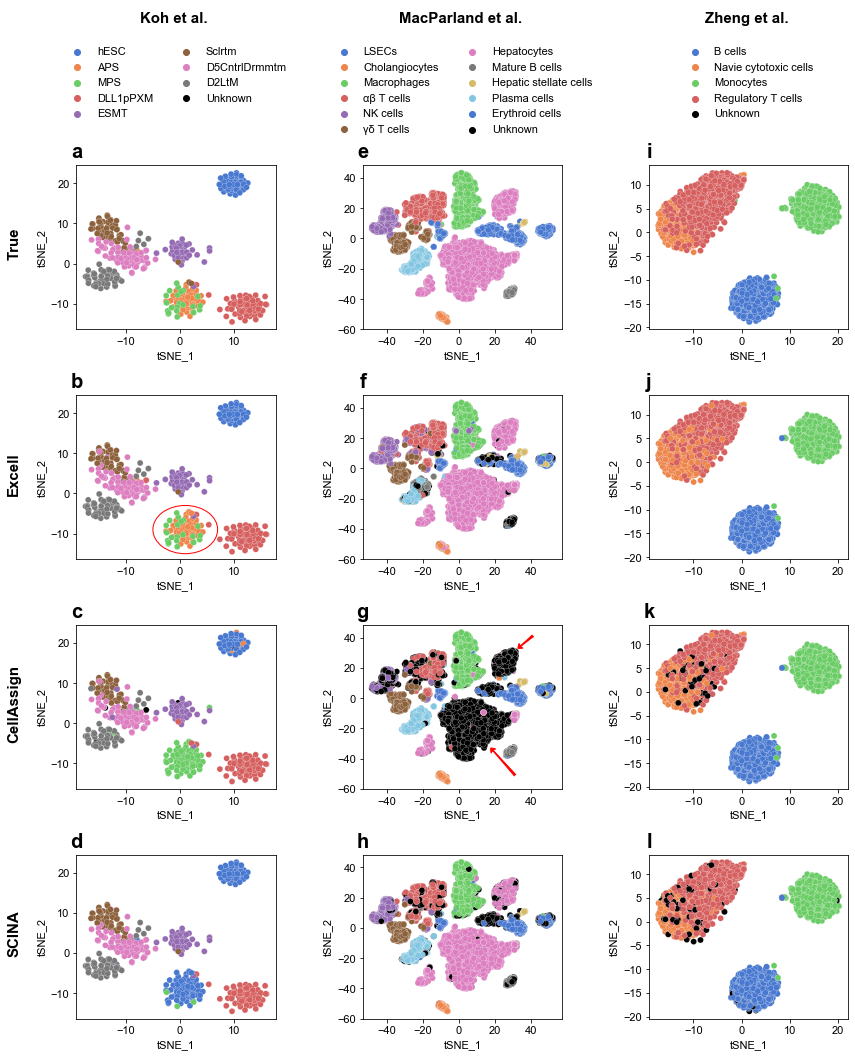

In [317]:
matplotlib.rcParams.update({'font.size': 11})
sns.set_palette(sns.color_palette("muted"))
from matplotlib.patches import Circle, FancyArrowPatch, ArrowStyle

fig2 = plt.figure(figsize=(12,15))
gs2 = fig2.add_gridspec(4,3)

# draw figures
# first column
#f2_koh_true = fig2.add_subplot(gs2[0,0])
f2_koh_cellassign = fig2.add_subplot(gs2[0,0])
f2_koh_excell = fig2.add_subplot(gs2[1,0])
f2_koh_acc = fig2.add_subplot(gs2[2,0])
fig2.add_subplot(gs2[3,0])

# second column
#f2_liver_true = fig2.add_subplot(gs2[0,1])
f2_liver_cellassign = fig2.add_subplot(gs2[0,1])
f2_liver_excell = fig2.add_subplot(gs2[1,1])
f2_liver_acc = fig2.add_subplot(gs2[2,1])
fig2.add_subplot(gs2[3,1])

# third column 
#f2_zheng_true = fig2.add_subplot(gs2[0,2])
f2_zheng_cellassign = fig2.add_subplot(gs2[0,2])
f2_zheng_excell = fig2.add_subplot(gs2[1,2])
f2_zheng_acc = fig2.add_subplot(gs2[2,2])
fig2.add_subplot(gs2[3,2])



axes2 = fig2.get_axes()
lw = 0.2
# fillin
# first column
cmap_koh = sns.color_palette("muted", len(koh_hue_order))
cmap_koh[-1] = (0,0,0)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[0], hue=koh_meta['celltype'].values, hue_order=koh_hue_order,
               palette=cmap_koh, linewidth=lw)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[1], hue=koh_excell, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)

mps_aps = Circle((1,-9), 6, fill=None, color='r')
axes2[1].add_patch(mps_aps)

sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[2], hue=koh_cellassign, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[3], hue=koh_scina, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)


# second column
cmap_liver = sns.color_palette("muted", len(liver_hue_order))
cmap_liver[-1] = (0,0,0)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[4], hue=liver_true, hue_order=liver_hue_order,
               palette=cmap_liver, linewidth=lw)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[5], hue=liver_excell, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[6], hue=liver_cellassign, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)

arr_style = ArrowStyle("Fancy", head_length=.4, head_width=.6, tail_width=.2)
hepa_arr1 = FancyArrowPatch((32,-52),(17,-32), color='r', mutation_scale=10, arrowstyle=arr_style)
hepa_arr2 = FancyArrowPatch((42,42),(32,32), color='r', mutation_scale=10, arrowstyle=arr_style)
axes2[6].add_patch(hepa_arr1)
axes2[6].add_patch(hepa_arr2)

sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[7], hue=liver_scina, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)


# third column
cmap_zheng = sns.color_palette("muted", len(zheng_hue_order))
cmap_zheng[-1] = (0,0,0)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[8], hue=zheng_true, hue_order=zheng_hue_order,
               palette=cmap_zheng, linewidth=lw)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[9], hue=zheng_excell, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[10], hue=zheng_cellassign, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)
#mps_aps = Circle((-10,2.5), 5, fill=None, color='black')
#axes2[10].add_patch(mps_aps)

sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[11], hue=zheng_scina, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)
#mps_aps = Circle((-13,2.1), 5, fill=None, color='black')
#axes2[11].add_patch(mps_aps)
      
# legend position
datasets = ['Koh et al.', 'MacParland et al.', 'Zheng et al.']
for i in [0, 4, 8]:
    if i == 0:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=2, title='Koh et al. \n')
    elif i == 4:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=2, title='MacParland et al. \n')
    elif i == 8:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=1, title='Zheng et al. \n')
        
    plt.setp(lgd.get_title(),fontsize=15, fontweight='bold')    
    lgd.legendHandles[-1].set_color('black')
    lgd.get_frame().set_linewidth(0.0)
    
methods = ['True', 'Excell', 'CellAssign', 'SCINA']
for i in [0, 1, 2, 3]:
    axes2[i].text(-32, 5, methods[i], verticalalignment='center'
                  , rotation=90, fontsize=15, fontweight='bold')
    
# subfigure
fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=20)
for i, txt in enumerate(['a', 'b', 'c', 'd',  'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']):
    axes2[i].set_title(txt, position=(0, 1.0+0.01), fontproperties=fontprop)
    
plt.tight_layout()
plt.savefig('figure3.svg')

# Figure 4

In [3]:
# koh
koh_cellassign =pd.read_csv('koh_result/koh_cellassign_time.csv')['x'] * 60
koh_cpu = pd.read_csv('koh_result/koh_excell_cpu_time.csv')['0']
koh_gpu = pd.read_csv('koh_result/koh_excell_gpu_time.csv')['0']
koh_scina = pd.Series(np.repeat(0.1739633, 20))
koh_time = pd.concat([koh_scina, koh_cellassign, koh_cpu, koh_gpu], 
                     axis=1)
koh_time.columns = ['SCINA ','CellAssign', 'Excell - CPU', 'Excell - GPU']

# liver
liver_cellassign =pd.read_csv('liver_result/liver_cellassign_time.csv')['x'] * 60
liver_cpu = pd.read_csv('liver_result/liver_excell_cpu_time.csv')['0']
liver_gpu = pd.read_csv('liver_result/liver_excell_gpu_time.csv')['0']
liver_scina = pd.Series(np.repeat(3.898857, 20))
liver_time = pd.concat([liver_scina, liver_cellassign, liver_cpu, liver_gpu], 
                     axis=1)
liver_time.columns = ['SCINA ','CellAssign', 'Excell - CPU', 'Excell - GPU']

# Zheng
Zheng_cellassign = pd.read_csv('zhengmix4eq_result/Zhengmix4eq_cellassign_time.csv')['x'].apply(lambda x: 3600 * x if x<10 else 60 *x)
Zheng_cpu = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_cpu_time.csv')['0']
Zheng_gpu = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_gpu_time.csv')['0']
Zheng_scina = pd.Series(np.repeat(3.535497, 20))
Zheng_time = pd.concat([Zheng_scina, Zheng_cellassign, Zheng_cpu, Zheng_gpu],
                      axis=1)
Zheng_time.columns = ['SCINA ','CellAssign', 'Excell - CPU', 'Excell - GPU']


In [4]:
class custom_LL(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Delta, Beta, Y, X, S, mask):
        with torch.no_grad():
            # n x g x t
            Mu  = (S.log()[:,None,None] + X.mm(Beta)[:,:,None] + (mask*Delta)[None,:,:]).exp()
            # n x t 
            logP = torch.distributions.poisson.Poisson(Mu).log_prob(Y[:,:,None]).sum(dim=1)
            # n -> 1
            LL = logP.logsumexp(axis=1).mean()
            
            # gamma: n x t 
            Gamma = (logP - logP.logsumexp(axis=1)[:,None]).exp()
            
            # now gradient
            A = Mu - Y[:,:,None]
            
            grad_Delta = (A * Gamma[:,None,:]).mean(axis=0) * mask
            grad_Beta = (A @ Gamma[:,:,None] @ X[:,None,:]).mean(axis=0).T
            
            # save for backward
            ctx.save_for_backward(grad_Delta, grad_Beta)
            
        return LL
        
    @staticmethod
    def backward(ctx, grad_output):
        grad_Y = grad_X = grad_S = grad_mask = None
        grad_Delta, grad_Beta = ctx.saved_tensors
        
        return grad_Delta, grad_Beta, grad_Y, grad_X, grad_S, grad_mask
            

def loss_LL(Delta, Beta, Y ,X ,S, mask):
   # n x g x t
    Mu  = (S.log()[:,None,None] + X.mm(Beta)[:,:,None] + (mask*Delta)[None,:,:]).exp()
    # n x t 
    logP = torch.distributions.poisson.Poisson(Mu).log_prob(Y[:,:,None]).sum(dim=1)
    # n -> 1
    return logP.logsumexp(axis=1).mean()

In [14]:
# n= 100, 500, 1000, 5000, 10000, g=50, t = 10
df_time_n = pd.DataFrame(columns=['N', 'Time (s)', 'Method'])
g, t, p = 200, 50, 1
Ns = np.linspace(1000, 10000, 10).astype(int)
with torch.cuda.device(4):
    Delta = torch.ones(size=(g,t), requires_grad=True)
    Beta = torch.ones(size=(p,g), requires_grad=True)
    mask = torch.ones(size=Delta.shape)
    for n in Ns:
        Y = torch.ones(size=(n,g))
        X = torch.ones(n)[:,None]
        s = torch.ones(n)
        for i in range(5):
            start0 = time.time()
            LL = loss_LL(Delta, Beta, Y, X, s, mask)
            start = time.time()
            LL.backward()
            end = time.time()
            df_time_n = df_time_n.append({'N':float(n), 'Time (s)':float(end-start), 'Method':'Autograd'}, ignore_index=True)
            Beta.grad.zero_()
            Delta.grad.zero_()
            
            start1 = time.time()
            LL1 = custom_LL.apply(Delta, Beta, Y ,X ,s, mask)
            LL1.backward()
            end1 = time.time()
            df_time_n = df_time_n.append({'N':float(n), 'Time (s)':float(end1-start1-start+start0), 'Method':'Optimized'}, ignore_index=True)
            Beta.grad.zero_()
            Delta.grad.zero_()
            
df_time_g = pd.DataFrame(columns=['G', 'Time (s)', 'Method'])
n, t, p = 10000, 50, 1
Gs = np.linspace(10, 500, 10).astype(int)
with torch.cuda.device(4):
    X = torch.ones(n)[:,None]
    s = torch.ones(n)
    for g in Gs:
        Y = torch.ones(size=(n,g))
        Delta = torch.ones(size=(g,t), requires_grad=True)
        Beta = torch.ones(size=(p,g), requires_grad=True)
        mask = torch.ones(size=Delta.shape)
        for i in range(5):
            start0 = time.time()
            LL = loss_LL(Delta, Beta, Y, X, s, mask)
            start = time.time()
            LL.backward()
            end = time.time()
            df_time_g = df_time_g.append({'G':float(g), 'Time (s)':float(end-start), 'Method':'Autograd'}, ignore_index=True)
            Beta.grad.zero_()
            Delta.grad.zero_()
    
            start1 = time.time()
            LL1 = custom_LL.apply(Delta, Beta, Y, X, s, mask)
            LL1.backward()
            end1 = time.time()
            df_time_g = df_time_g.append({'G':float(g), 'Time (s)':float(end1-start1-start+start0), 'Method':'Optimized'}, ignore_index=True)
            Beta.grad.zero_()
            Delta.grad.zero_()
            
n, g, p = 10000, 100, 10
Ts = [1,5,10,20,50,100]
df_time_t = pd.DataFrame(columns=['T', 'Time (s)', 'Method'])

X = torch.ones(size=(n,p))
s = torch.ones(n)
Beta = torch.ones(size=(p,g), requires_grad=True)
Y = torch.ones(size=(n,g))
for t in Ts:
    Delta = torch.ones(size=(g,t), requires_grad=True)
    mask = torch.ones(size=Delta.shape)
    for i in range(5):
        
        start0 = time.time()
        LL = loss_LL(Delta, Beta, Y, X, s, mask)
        start = time.time() 
        LL.backward()
        end = time.time()
        df_time_t = df_time_t.append({'T':float(t), 'Time (s)':float(end-start), 'Method':'Autograd'}, ignore_index=True)
        Beta.grad.zero_()
        Delta.grad.zero_()
        
        start1 = time.time()
        LL1 = custom_LL.apply(Delta, Beta, Y ,X ,s, mask)
        LL1.backward()
        end1 = time.time()
        df_time_t = df_time_t.append({'T':float(t), 'Time (s)':float(end1-start1-start+start0), 'Method':'Optimized'}, ignore_index=True)
        Beta.grad.zero_()
        Delta.grad.zero_()



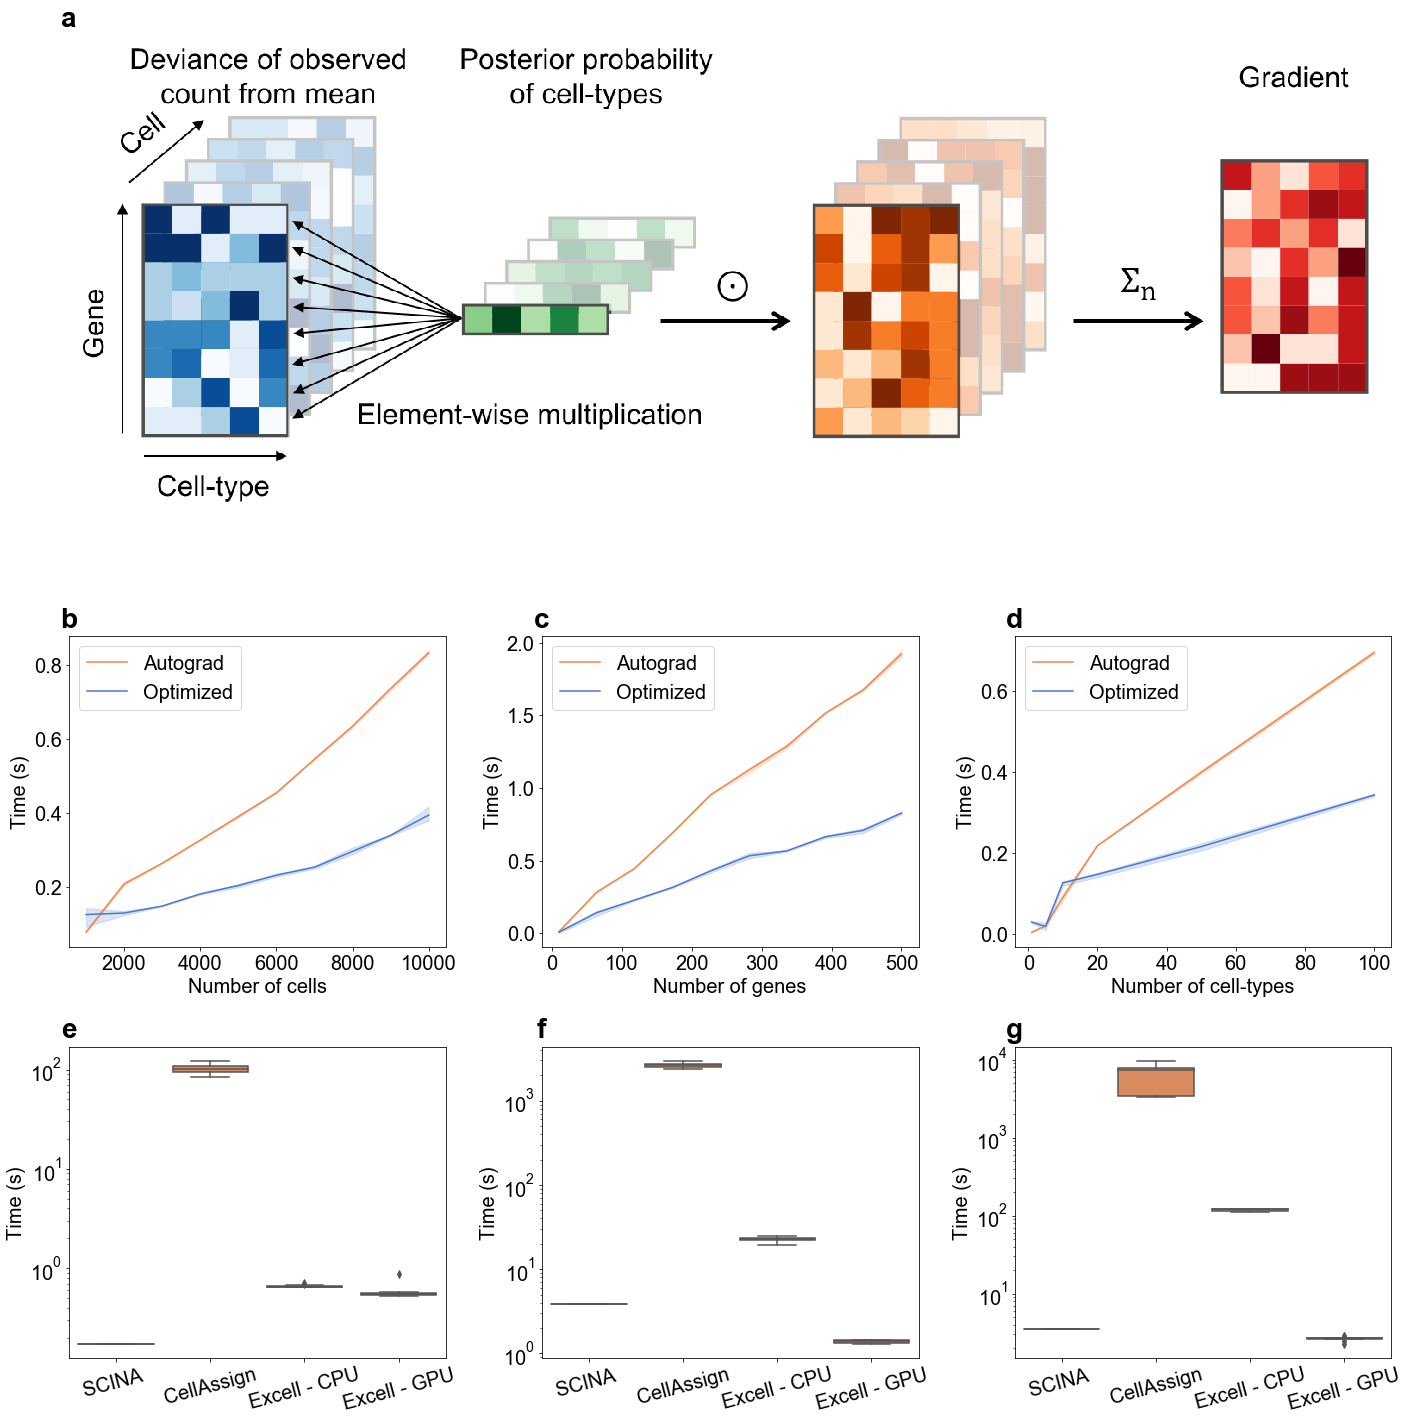

In [306]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_palette(sns.color_palette("muted"))

# reference : https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html
fig3 = plt.figure(figsize=(20,20))
gs3 = fig3.add_gridspec(14,12)

# first row
f3_summary = fig3.add_subplot(gs3[0:6, 0:12])
fig3_sum = mpimg.imread('/home/hanbin973/Excell/figure1.png')
f3_summary.imshow(fig3_sum)
f3_summary.axis('off')

# second row
fig3s1 = fig3.add_subplot(gs3[6:10, 0:4])
fig3s2 = fig3.add_subplot(gs3[6:10, 4:8])
fig3s3 = fig3.add_subplot(gs3[6:10, 8:12])

cmap = sns.color_palette("muted", 2)[::-1]
sns.lineplot(x='N', y='Time (s)', data=df_time_n, hue='Method',ax=fig3s1, palette=cmap)
sns.lineplot(x='G', y='Time (s)', data=df_time_g, hue='Method',ax=fig3s2, palette=cmap)
sns.lineplot(x='T', y='Time (s)', data=df_time_t, hue='Method',ax=fig3s3, palette=cmap)

fig3s1.set_xlabel('Number of cells')
fig3s2.set_xlabel('Number of genes')
fig3s3.set_xlabel('Number of cell-types')

# third row
fig3b1 = fig3.add_subplot(gs3[10:14, 0:4])
fig3b2 = fig3.add_subplot(gs3[10:14, 4:8])
fig3b3 = fig3.add_subplot(gs3[10:14, 8:12])

fig3b1.set_yscale('log')
fig3b2.set_yscale('log')
fig3b3.set_yscale('log')

sns.boxplot(x='Methods', y='Time (s)',
            data=pd.melt(koh_time, var_name='Methods', value_name='Time (s)'),
           ax=fig3b1)
sns.boxplot(x='Methods', y='Time (s)', 
            data=pd.melt(liver_time, var_name='Methods', value_name='Time (s)'),
           ax=fig3b2)
sns.boxplot(x='Methods', y='Time (s)', 
            data=pd.melt(Zheng_time, var_name='Methods', value_name='Time (s)'),
            ax=fig3b3)


axes3 = fig3.get_axes()


fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=28)
for i, txt in enumerate(['a', 'b', 'c', 'd', 'e', 'f', 'g']):
    axes3[i].set_title(txt, position=(0, 1.0+0.01), fontproperties=fontprop)

for i in [1,2,3]:
    handles, labels = axes3[i].get_legend_handles_labels()
    axes3[i].legend(handles=handles[1:], labels=labels[1:])
    
for i in [4,5,6]:
    axes3[i].set_xticklabels(['SCINA ','CellAssign', 'Excell - CPU', 'Excell - GPU'], rotation=15)
    axes3[i].set_xlabel('')
    


plt.tight_layout()
plt.savefig('figure4.svg')
plt.show()

# Graphical illustration


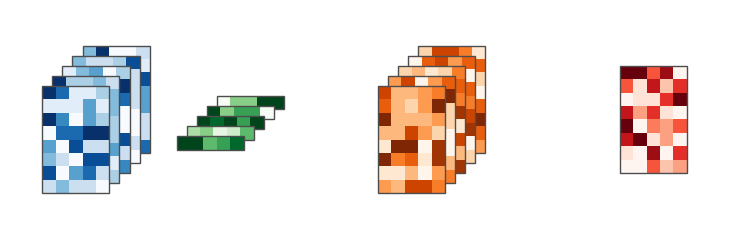

In [188]:
import os
import numpy as np
from math import gcd
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Arrow
from matplotlib.patches import FancyArrowPatch


NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.
n, g, t = 5, 32, 20

def add_layer(ax, heatmaps, patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ind0=0
              ):
    colormaps_str = ['Blues', 'Greens', 'Oranges', 'Reds']
    colormaps = [plt.get_cmap(cmap_str)(np.linspace(0, 1, 10)) for cmap_str in colormaps_str]
    #cmap = plt.get_cmap('Greens')
    #small_patch_colors = [cmap[i] for i in np.random.choice(10, size=len(heatmaps))]
    
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        
        gcd_xy = gcd(int(size[1]), int(size[0]))
        for y_loc in range(int(size[0]/gcd_xy)):
            for x_loc in range(int(size[1]/gcd_xy)):
                loc_start_small = np.array([x_loc,y_loc]) * gcd_xy
                ax.add_patch(Rectangle(loc_start + ind *loc_diff +loc_start_small
                                          , gcd_xy, gcd_xy,
                                      facecolor=colormaps[ind0][np.random.choice(10)],
                                      edgecolor='none'))
                
        
        ax.add_patch(Rectangle(loc_start + ind * loc_diff, size[1], size[0], 
                               facecolor='none', 
                               edgecolor=(Dark * np.ones(3))))
            
def add_arrow(arrows, arrow_colors, direction,
              tail = [0,0]
             ):
    # add arrow
    tail = np.array(tail)
    head = tail + np.array(direction)
    arrows.append(FancyArrowPatch(tail, head, 
                                  arrowstyle='->',
                                 mutation_scale=10))
    arrow_colors.append(Dark)

def add_text_above_arrow(texts, arrows, margin, font_size):
    # add text above margin
    for text, arrow in zip(texts, arrows):
        pass
        
    
def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 40
    flag_omit = True

    patches = []
    colors = []
    
    arrows = []
    arrow_colors = []
    
    arrow_texts = []
    
    heatmaps = []

    fig, ax = plt.subplots()


    ############################
    
    # draw rectangles and heatmaps
    loc_diff = 3
    
    size_list = [(g, t), (g/8, t), (g, t), (g, t)]
    num_list = [n, n, n, 1]
    x_diff_list = [0, 40, 60, 60]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[-loc_diff, -loc_diff]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    x_starts = np.cumsum(x_diff_list)
    y_starts = np.array([0, -loc_diff * int(n), 0, -loc_diff * int(n/2)])
    top_left_list = np.c_[x_starts, y_starts]

    for ind in range(len(size_list)-1,-1,-1):
        add_layer(ax, heatmaps, patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind], loc_diff=loc_diff_list[ind],
                 ind0=ind)
        
    # sample color for each cell
    

    # draw arrows between boxes
    add_arrow(arrows, arrow_colors, [15,0], 
              [(x_starts[1]+x_starts[2])/2 - loc_diff * n/2, -g/2 -loc_diff*n/2 ])
    
    add_arrow(arrows, arrow_colors, [15,0], 
              [(x_starts[2]+x_starts[3])/2, -g/2 -loc_diff*n/2 ])
      
    """ 
    for arrow, arrow_color in zip(arrows, arrow_colors):
        ax.add_patch(arrow)
        
    for small_patch, small_patch_color in zip(heatmaps,small_patch_colors):
        small_patch.set_color(small_patch_color)
        ax.add_patch(small_patch)
        
    for idx, (patch, color) in enumerate(zip(patches, colors)):
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)
    """     
        
    

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(8, 2.5)
    plt.savefig('figure1a.svg')

# supplementary

# Supp1

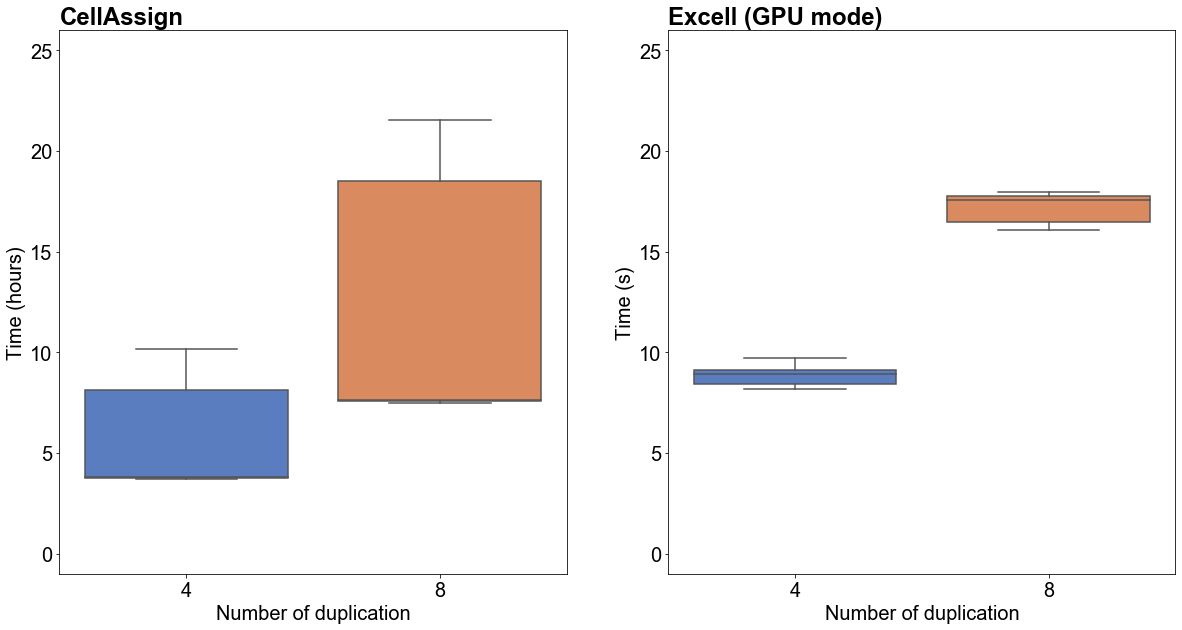

In [274]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_palette(sns.color_palette("muted"))

time8 = [7.56800, 20.17836, 18.79113, 7.49243, 21.51840, 7.56232, 7.58233, 7.64001, 17.75194, 7.58492]
time4_1 = pd.read_csv('Zhengmix4eq_cellassign_time_one_4.csv',index_col=0)['x']
time4_2 = pd.read_csv('Zhengmix4eq_cellassign_time_two_4.csv',index_col=0)['x']

time_8_excell = pd.read_csv('mix4eq_excell_gpu_time_8.csv',index_col=0)['0']
time_4_excell = pd.read_csv('mix4eq_excell_gpu_time_4.csv',index_col=0)['0']

df_long = pd.DataFrame({'4':list(time4_1)+list(time4_2), '8':time8})
df_long_excell = pd.DataFrame({'4':time_4_excell, '8':time_8_excell})

fig, (ax,ax1) = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(data=df_long,ax=ax)
ax.set_xlabel('Number of duplication')
ax.set_ylabel('Time (hours)')
ax.set_ylim([-1,26])

sns.boxplot(data=df_long_excell,ax=ax1)
ax1.set_xlabel('Number of duplication')
ax1.set_ylabel('Time (s)')
ax1.set_ylim([-1,26])


ax1.set_title('Excell (GPU mode)', fontweight='bold', loc='left')
ax.set_title('CellAssign', fontweight='bold', loc='left')

plt.savefig('supp1.svg')

In [283]:
time_8_excell.max(), time_4_excell.max()

(17.942367076873783, 9.699902772903444)

In [285]:
pd.Series(time8).max(), pd.concat([time4_1, time4_2]).max()

(21.5184, 10.1824381921689)

# Supp2

In [37]:
df_koh = pd.read_csv('supp_figures/tol_koh.csv', index_col=0).astype(float)
df_liver = pd.read_csv('supp_figures/tol_liver.csv', index_col=0).astype(float)
df_zheng = pd.read_csv('supp_figures/tol_zhengmix4eq.csv', index_col=0).astype(float)

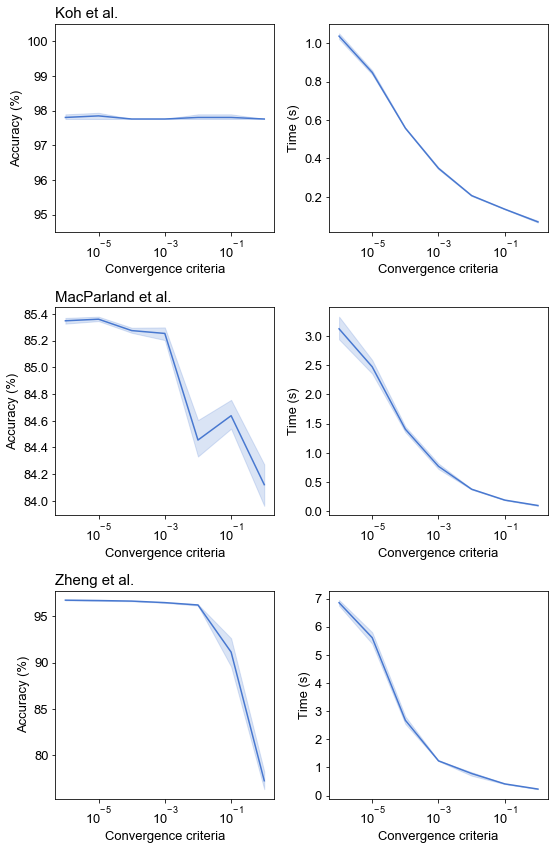

In [39]:
matplotlib.rcParams.update({'font.size': 13})
sns.set_palette(sns.color_palette("muted"))
fig, axes = plt.subplots(3,2, figsize=(8,12))

sns.lineplot(x='Convergence criteria', y='Accuracy (%)', data=df_koh, ax=axes[0,0])
sns.lineplot(x='Convergence criteria', y='Time (s)', data=df_koh, ax=axes[0,1])

sns.lineplot(x='Convergence criteria', y='Accuracy (%)', data=df_liver, ax=axes[1,0])
sns.lineplot(x='Convergence criteria', y='Time (s)', data=df_liver, ax=axes[1,1])

sns.lineplot(x='Convergence criteria', y='Accuracy (%)', data=df_zheng, ax=axes[2,0])
sns.lineplot(x='Convergence criteria', y='Time (s)', data=df_zheng, ax=axes[2,1])

for ax in axes.flatten():
    ax.set_xscale('log')

axes[0,0].set_title('Koh et al.',loc='left', fontdict={'fontsize':15, 'fontweight':'bold'})
axes[0,0].set_ylim([94.5, 100.5])
axes[0,0].set_yticks([95, 96, 97, 98, 99,100])
axes[1,0].set_title('MacParland et al.',loc='left',fontdict={'fontsize':15, 'fontweight':'bold'})
axes[2,0].set_title('Zheng et al.',loc='left',fontdict={'fontsize':15, 'fontweight':'bold'})
    
plt.tight_layout()
plt.savefig('supp2.svg')

# Supp3

In [318]:
#koh

koh_cell_names = pd.Series(['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'Unknown'],
                          index=['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'unassigned'])
koh_hue_order = ['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM', 'Unknown']

# tureplot
koh_meta=pd.read_csv('/scratch/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')

# cellassign
koh_cellassign = koh_cell_names.loc[pd.read_csv('koh_result/12_koh.csv')['x'].values].values.astype(str)
# excell
koh_excell = pd.read_csv('koh_result/koh_median.csv')['0'].values
# scina
koh_scina = pd.read_csv('koh_scina.csv', index_col=0)['x'].values

koh_scina_acc = pd.Series(np.repeat(0.800448430493274, 20))
koh_cellassign_acc = pd.read_csv('koh_result/koh_cellassign_acc.csv')['0']
koh_cpu_acc = pd.read_csv('koh_result/koh_excell_cpu_acc.csv')['0']
koh_gpu_acc = pd.read_csv('koh_result/koh_excell_gpu_acc.csv')['0']
koh_acc = pd.concat([koh_scina_acc, koh_cellassign_acc, koh_cpu_acc, koh_gpu_acc], axis=1) * 100

koh_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=koh_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')
#plt.ylim([0,100])
#liver

liver_cell_names = pd.Series(['LSECs', 'Cholangiocytes', 'Macrophages',
                   'αβ T cells', 'NK cells', 'γδ T cells',
                   'Hepatocytes', 'Mature B cells', 'Hepatic stellate cells',
                   'Plasma cells', 'Erythroid cells', 'Unknown', 'Unknown', 'Unknown'],
                               index=['LSECs', 'Cholangiocytes', 'Macrophages',
                                     'ab_T_cells', 'NK_cells', 'gd_T_cells',
                                     'Hepatocytes','Mature_B_cells','Hepatic_Stellate_Cells',
                                     'Plasma_cells', 'Erythroid_cells', 'unassigned', 'other', 'unknown'])

liver_hue_order = ['LSECs', 'Cholangiocytes', 'Macrophages',
                   'αβ T cells', 'NK cells', 'γδ T cells',
                   'Hepatocytes', 'Mature B cells', 'Hepatic stellate cells',
                   'Plasma cells', 'Erythroid cells', 'Unknown', 'Unknown']

#trueplot
liver_meta = pd.read_csv('/scratch/ch6845/dynamic_cell_classifier/data/HumanLiver_extract/HumanLiver.metadata.tsv',sep='\t')
clusterid_to_clustername=pd.read_csv('/data01/hanbin973/liver/HumanLiver.clusterid_to_clustername.tsv',sep='\t',header=None,index_col=0)
clusterid_to_clustername[1]=clusterid_to_clustername[1].str.replace(' ','_')
liver_true = liver_cell_names.loc[[list(clusterid_to_clustername[1])[i-1] for i in liver_meta['res.0.8']]].values.astype(str)


# cellassign
liver_cellassign = liver_cell_names.loc[pd.read_csv('liver_result/14_liver.csv')['x'].values].values.astype(str)
# excell
liver_excell = liver_cell_names.loc[pd.read_csv('liver_result/liver_median.csv')['0'].values].values.astype(str)
# scina
#print(pd.read_csv('liver_scina.csv', index_col=0)['x'].vlaues)
liver_scina = liver_cell_names[pd.read_csv('liver_scina.csv', index_col=0)['x'].values].values.astype(str)

liver_scina_acc = pd.Series(np.repeat(0.843083846518238, 20))
liver_cellassign_acc = pd.read_csv('liver_result/liver_cellassign_acc.csv')['0']
liver_cpu_acc = pd.read_csv('liver_result/liver_excell_cpu_acc.csv')['0']
liver_gpu_acc = pd.read_csv('liver_result/liver_excell_gpu_acc.csv')['0']
liver_acc = pd.concat([liver_scina_acc, liver_cellassign_acc, liver_cpu_acc, liver_gpu_acc], axis=1) * 100
liver_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=liver_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')

#Zheng

zheng_cell_names = pd.Series(['B cells', 'Navie cytotoxic cells', 
                              'Monocytes', 'Regulatory T cells', 'Unknown', 'Unknown'],
                            index=['b.cells','naive.cytotoxic',
                                  'cd14.monocytes','regulatory.t', 'unassigned', 'unknown'])
zheng_hue_order = ['B cells', 'Navie cytotoxic cells', 
                              'Monocytes', 'Regulatory T cells', 'Unknown']
#trueplot
zheng_meta = pd.read_csv('/scratch/ch6845/PSCC_Framework/datasets/extract/Zhengmix4eq_filtered.metadatacol.tsv', sep='\t')
zheng_true = zheng_cell_names.loc[zheng_meta['phenoid']].values.astype(str)
# cellassign
zheng_cellassign = zheng_cell_names.loc[pd.read_csv('zhengmix4eq_result/1_Zhengmix4eq.csv')['x'].values].values.astype(str)
# excell
zheng_excell = zheng_cell_names.loc[pd.read_csv('zhengmix4eq_result/zhengmix4eq_median.csv')['0'].values].values.astype(str)
# scina
zheng_scina = zheng_cell_names[pd.read_csv('zheng_scina.csv', index_col=0)['x']].values.astype(str)

Zheng_scina_acc = pd.Series(np.repeat(0.940660991487231, 20)) * 100
Zheng_cellassign_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_cellassign_acc.csv')['0'] * 100
Zheng_cpu_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_cpu_acc.csv')['0'] * 100
Zheng_gpu_acc = pd.read_csv('zhengmix4eq_result/zhengmix4eq_excell_gpu_acc.csv')['0'] * 100
Zheng_acc = pd.concat([Zheng_scina_acc, Zheng_cellassign_acc, Zheng_cpu_acc, Zheng_gpu_acc], axis=1) 
Zheng_acc.columns = ['SCINA', 'CellAssign', 'Excell - CPU', 'Excell - GPU']
#sns.boxplot(data=Zheng_acc.melt(var_name='Methods', value_name='Accuracy (%)'), x='Methods', y='Accuracy (%)')
#plt.ylim([0,100])


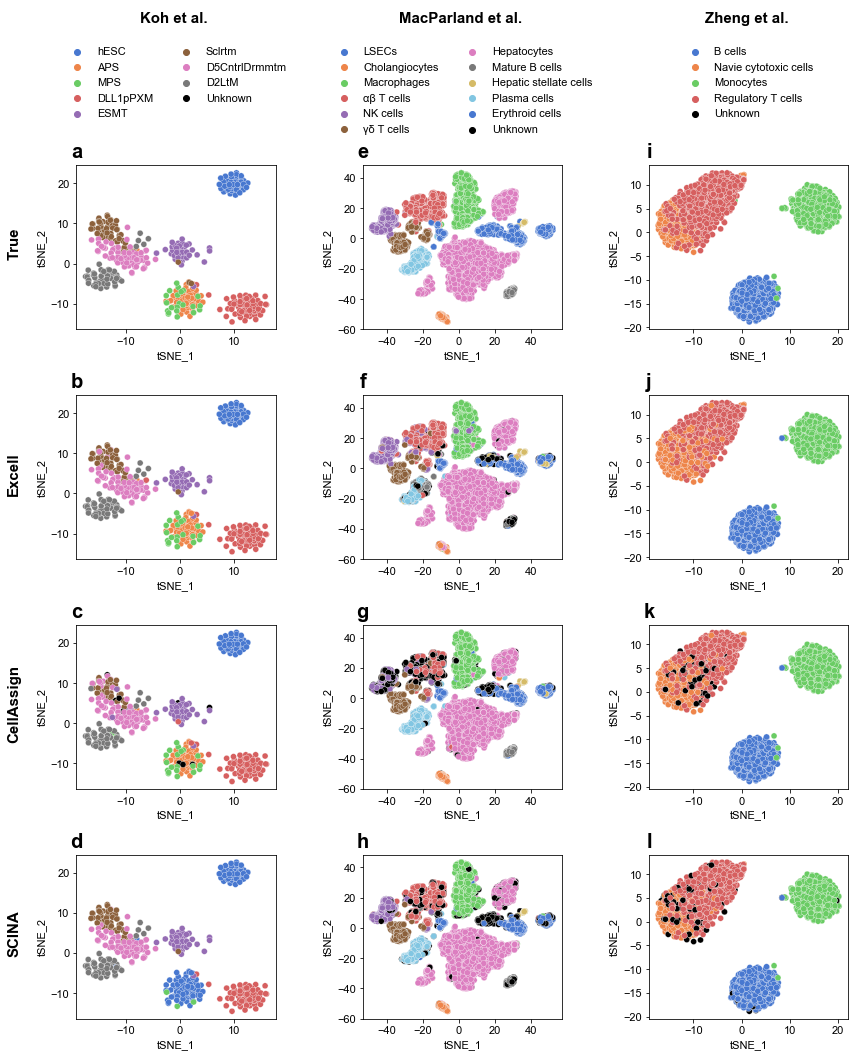

In [319]:
matplotlib.rcParams.update({'font.size': 11})
sns.set_palette(sns.color_palette("muted"))

fig2 = plt.figure(figsize=(12,15))
gs2 = fig2.add_gridspec(4,3)

# draw figures
# first column
#f2_koh_true = fig2.add_subplot(gs2[0,0])
f2_koh_cellassign = fig2.add_subplot(gs2[0,0])
f2_koh_excell = fig2.add_subplot(gs2[1,0])
f2_koh_acc = fig2.add_subplot(gs2[2,0])
fig2.add_subplot(gs2[3,0])

# second column
#f2_liver_true = fig2.add_subplot(gs2[0,1])
f2_liver_cellassign = fig2.add_subplot(gs2[0,1])
f2_liver_excell = fig2.add_subplot(gs2[1,1])
f2_liver_acc = fig2.add_subplot(gs2[2,1])
fig2.add_subplot(gs2[3,1])

# third column 
#f2_zheng_true = fig2.add_subplot(gs2[0,2])
f2_zheng_cellassign = fig2.add_subplot(gs2[0,2])
f2_zheng_excell = fig2.add_subplot(gs2[1,2])
f2_zheng_acc = fig2.add_subplot(gs2[2,2])
fig2.add_subplot(gs2[3,2])



axes2 = fig2.get_axes()
lw = 0.3
# fillin
# first column
cmap_koh = sns.color_palette("muted", len(koh_hue_order))
cmap_koh[-1] = (0,0,0)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[0], hue=koh_meta['celltype'].values, hue_order=koh_hue_order,
               palette=cmap_koh, linewidth=lw)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[1], hue=koh_excell, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[2], hue=koh_cellassign, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes2[3], hue=koh_scina, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh, linewidth=lw)


# second column
cmap_liver = sns.color_palette("muted", len(liver_hue_order))
cmap_liver[-1] = (0,0,0)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[4], hue=liver_true, hue_order=liver_hue_order,
               palette=cmap_liver, linewidth=lw)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[5], hue=liver_excell, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[6], hue=liver_cellassign, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)
sns.scatterplot(data=liver_meta, x='tSNE_1', y='tSNE_2', ax=axes2[7], hue=liver_scina, hue_order=liver_hue_order, legend=False,
               palette=cmap_liver, linewidth=lw)


# third column
cmap_zheng = sns.color_palette("muted", len(zheng_hue_order))
cmap_zheng[-1] = (0,0,0)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[8], hue=zheng_true, hue_order=zheng_hue_order,
               palette=cmap_zheng, linewidth=lw)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[9], hue=zheng_excell, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[10], hue=zheng_cellassign, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)
sns.scatterplot(data=zheng_meta, x='tSNE_1', y='tSNE_2', ax=axes2[11], hue=zheng_scina, hue_order=zheng_hue_order, legend=False,
               palette=cmap_zheng, linewidth=lw)

      
# legend position
datasets = ['Koh et al.', 'MacParland et al.', 'Zheng et al.']
for i in [0, 4, 8]:
    if i == 0:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=2, title='Koh et al. \n')
    elif i == 4:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=2, title='MacParland et al. \n')
    elif i == 8:
        lgd = axes2[i].legend(loc='upper center', bbox_to_anchor=(0.5, 2),
              ncol=1, title='Zheng et al. \n')
        
    plt.setp(lgd.get_title(),fontsize=15, fontweight='bold')    
    lgd.legendHandles[-1].set_color('black')
    lgd.get_frame().set_linewidth(0.0)
    
methods = ['True', 'Excell', 'CellAssign', 'SCINA']
for i in [0, 1, 2, 3]:
    axes2[i].text(-32, 5, methods[i], verticalalignment='center'
                  , rotation=90, fontsize=15, fontweight='bold')
    
# subfigure
fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=20)
for i, txt in enumerate(['a', 'b', 'c', 'd',  'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']):
    axes2[i].set_title(txt, position=(0, 1.0+0.01), fontproperties=fontprop)
    
plt.tight_layout()
#plt.savefig('figure2.svg')

# Supp5

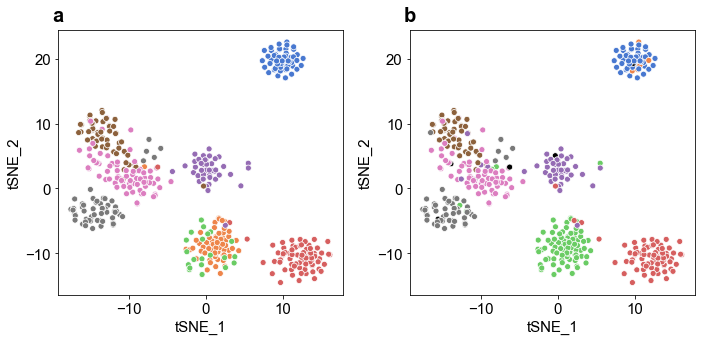

In [187]:
matplotlib.rcParams.update({'font.size': 15})
sns.set_palette(sns.color_palette("muted"))

fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes[0], hue=koh_excell, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh)
sns.scatterplot(data=koh_meta, x='tSNE_1', y='tSNE_2', ax=axes[1], hue=koh_cellassign, hue_order=koh_hue_order, legend=False,
               palette=cmap_koh)

fontprop = fm.FontProperties(fname="/home/hanbin973/.fonts/arialbd.ttf", size=20)
for i, txt in enumerate(['a', 'b']):

    axes[i].set_title(txt, position=(0, 1.0+0.01), fontproperties=fontprop)

plt.tight_layout()
plt.show()

# Supp6

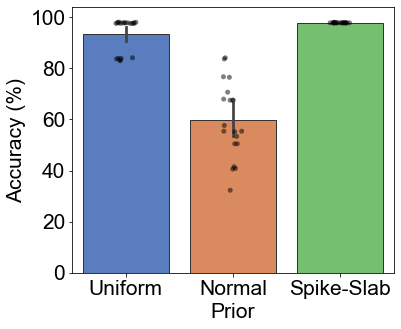

In [205]:
# method vs accuracy
matplotlib.rcParams.update({'font.size': 21})
sns.set_palette(sns.color_palette("muted"))
fig, ax = plt.subplots(figsize=(6,5))

uniform = pd.read_csv('uniformprior.csv', index_col=0)
normal = pd.read_csv('normalprior.csv', index_col=0)
ss = pd.read_csv('ssprior.csv', index_col=0)

uniform['Prior'] = 'Uniform'
normal['Prior'] = 'Normal'
ss['Prior'] = 'Spike-Slab'

df = pd.concat([uniform, normal, ss], axis=0)
df.columns = ['Accuracy (%)', 'Prior']
df['Accuracy (%)'] = df['Accuracy (%)'] * 100



sns.barplot(data=df, x='Prior', y='Accuracy (%)', ax=ax,
           edgecolor='.2')
plt.setp(ax.patches, linewidth=1)
sns.stripplot(data=df, x='Prior', y='Accuracy (%)', ax=ax,
             color='0', alpha=.5)


plt.tight_layout()
plt.show()